#### Project-2


# Project - Development of Credit Risk Model & Scorecard

### Problem Statement :
In the context of our financial institution, we aim to develop a robust Credit Risk Model and
accompanying Scorecard to assess the creditworthiness of loan applicants. This model will
serve as a critical tool to enhance our lending decisions, reduce potential credit losses, and
ultimately, optimize the allocation of credit resources. The primary objective is to predict the
likelihood of default for each loan applicant and assign a numerical credit score that quantifies
their credit risk. The model should be built on a historical dataset of our loan portfolio and should be capable of generalizing to future applicants.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Data Gathering

In [3]:
df = pd.read_csv("loan_data.csv")
df.head()                            

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,60516983,64537751,20000,20000,20000,36 months,12.29,667.06,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,41000,NaN,NaN,NaN
1,60187139,64163931,11000,11000,11000,36 months,12.69,369.00,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,13100,NaN,NaN,NaN
2,60356453,64333218,7000,7000,7000,36 months,9.99,225.84,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,16300,NaN,NaN,NaN
3,59955769,63900496,10000,10000,10000,36 months,10.99,327.34,B,B4,...,NaN,NaN,NaN,NaN,NaN,NaN,34750,NaN,NaN,NaN
4,58703693,62544456,9550,9550,9550,36 months,19.99,354.87,E,E4,...,NaN,NaN,NaN,NaN,NaN,NaN,14100,NaN,NaN,NaN


In [4]:
df.describe() # Summary statistics

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.210940e+05,4.210940e+05,421094.000000,421094.000000,421094.000000,421094.000000,421094.000000,4.210940e+05,421094.000000,421094.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,4.210940e+05,21372.000000,21372.000000,21372.000000
mean,5.393094e+07,5.759572e+07,15240.255561,15240.255561,15234.125991,12.601731,441.872719,7.696561e+04,19.196014,0.347397,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.365751e+04,0.943945,1.537058,1.977307
std,9.475416e+06,1.013357e+07,8571.313525,8571.313525,8567.923312,4.317873,244.857549,7.395005e+04,23.504060,0.927696,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.766386e+04,1.446872,2.723339,2.874067
min,5.670500e+04,7.082500e+04,1000.000000,1000.000000,900.000000,5.320000,30.120000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,4.612481e+07,4.922616e+07,8500.000000,8500.000000,8500.000000,9.170000,263.930000,4.600000e+04,12.590000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.440000e+04,0.000000,0.000000,0.000000
50%,5.536030e+07,5.895358e+07,14000.000000,14000.000000,14000.000000,12.290000,385.425000,6.500000e+04,18.600000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.460000e+04,0.000000,0.000000,2.000000
75%,6.186216e+07,6.604582e+07,20000.000000,20000.000000,20000.000000,15.590000,578.790000,9.169125e+04,25.340000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,4.167425e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [6]:
df.shape

(421094, 74)

## EDA

In [7]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head() 

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,60516983,64537751,20000,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,65000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,542xx,WI,20.72,0,Sep-00,1,NaN,NaN,25,0,31578,77.0,42,w,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,52303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41000,NaN,NaN,NaN
1,60187139,64163931,11000,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,40000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,235xx,VA,24.57,0,Sep-02,0,36.0,80.0,13,1,5084,38.8,41,w,0.0,0.0,10043.49,10043.49,9942.67,100.81,0.0,0.0,0.0,Oct-15,10059.00,NaN,Jan-16,0,79.0,1,INDIVIDUAL,NaN,NaN,NaN,0,332,175731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100,NaN,NaN,NaN
2,60356453,64333218,7000,7000,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,32000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,350xx,AL,32.41,0,Feb-06,1,NaN,NaN,18,0,12070,74.0,36,f,0.0,0.0,221.96,221.96,167.56,54.40,0.0,0.0,0.0,Oct-15,225.84,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,202012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16300,NaN,NaN,NaN
3,59955769,63900496,10000,10000,10000,36 months,10.99,327.34,B,B4,Service Manager,10+ years,MORTGAGE,48000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,483xx,MI,30.98,0,Oct-99,2,NaN,NaN,18,0,22950,66.0,41,f,0.0,0.0,315.13,315.13,235.76,79.37,0.0,0.0,0.0,Oct-15,327.34,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,108235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34750,NaN,NaN,NaN
4,58703693,62544456,9550,9550,9550,36 months,19.99,354.87,E,E4,NaN,NaN,RENT,32376.0,Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,546xx,WI,32.54,0,Nov-99,3,69.0,NaN,9,0,4172,29.6,26,w,0.0,0.0,333.66,333.66,195.78,137.88,0.0,0.0,0.0,Oct-15,354.87,NaN,Jan-16,0,69.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,45492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100,NaN,NaN,NaN


In [8]:
df["loan_status"].value_counts() #target column here

Current               377553
Fully Paid             22984
Issued                  8460
Late (31-120 days)      4691
In Grace Period         3107
Charged Off             2773
Late (16-30 days)       1139
Default                  387
Name: loan_status, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421094 entries, 0 to 421093
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           421094 non-null  int64  
 1   member_id                    421094 non-null  int64  
 2   loan_amnt                    421094 non-null  int64  
 3   funded_amnt                  421094 non-null  int64  
 4   funded_amnt_inv              421094 non-null  int64  
 5   term                         421094 non-null  object 
 6   int_rate                     421094 non-null  float64
 7   installment                  421094 non-null  float64
 8   grade                        421094 non-null  object 
 9   sub_grade                    421094 non-null  object 
 10  emp_title                    397220 non-null  object 
 11  emp_length                   397277 non-null  object 
 12  home_ownership               421094 non-null  object 
 13 

In [70]:
df.isnull().sum() # Check for missing values

id                                  0
member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       23874
emp_length                      23817
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
loan_status                         0
pymnt_plan                          0
url                                 0
desc                           421049
purpose                             0
title                             132
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_

In [11]:
df1 = df.isnull().mean()
df1 = df1[df1>0.8]
df1
#Data points or columns with over 80% of missing values should be removed or considered for
#deletion.

desc                         0.999893
mths_since_last_record       0.823282
annual_inc_joint             0.998786
dti_joint                    0.998791
verification_status_joint    0.998786
open_acc_6m                  0.949246
open_il_6m                   0.949246
open_il_12m                  0.949246
open_il_24m                  0.949246
mths_since_rcnt_il           0.950581
total_bal_il                 0.949246
il_util                      0.955789
open_rv_12m                  0.949246
open_rv_24m                  0.949246
max_bal_bc                   0.949246
all_util                     0.949246
inq_fi                       0.949246
total_cu_tl                  0.949246
inq_last_12m                 0.949246
dtype: float64

In [12]:
df.corr() #To get correlation for all column

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
id,1.000000,0.997540,-0.008293,-0.008293,-0.008559,-0.053335,-0.012911,0.015055,0.005694,0.002302,0.000662,0.006322,-0.037319,0.006306,0.003502,0.003775,-0.043794,-0.014480,0.169929,0.169716,-0.440158,-0.440237,-0.354523,-0.533914,-0.040980,-0.028615,-0.032295,-0.125119,0.011953,0.021221,NaN,0.056260,0.092846,-0.004834,0.002312,0.011241,0.012746,0.002460,0.006383,0.001371,0.002310,0.009510,0.009703,0.011797,0.004960,-0.000543,0.000428,0.019242,-0.013579,-0.000914,0.014084
member_id,0.997540,1.000000,-0.008624,-0.008624,-0.008889,-0.053378,-0.013266,0.014958,0.005807,0.002263,0.000717,0.006186,-0.037366,0.006107,0.003636,0.003745,-0.043594,-0.014674,0.169368,0.169156,-0.439786,-0.439864,-0.354261,-0.533334,-0.040818,-0.028336,-0.031970,-0.125274,0.011891,0.021181,NaN,0.056358,0.093700,-0.004732,0.002329,0.010903,0.008560,0.000563,0.005267,-0.002238,0.003673,0.005955,0.009033,0.006729,0.003529,-0.003295,0.000492,0.019141,-0.013022,-0.005038,0.012763
loan_amnt,-0.008293,-0.008624,1.000000,1.000000,0.999994,0.140690,0.941225,0.305734,0.006105,-0.010423,-0.039038,-0.034863,-0.014108,0.188211,-0.088898,0.334658,0.127701,0.208429,0.882686,0.882718,0.387697,0.387681,0.288030,0.577659,0.024097,0.012728,0.014938,0.167920,-0.027454,-0.018556,NaN,0.438866,0.018769,0.000646,-0.021436,0.325353,-0.040487,0.027938,-0.013290,0.024537,-0.010985,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.330871,0.009638,0.071500,0.007928
funded_amnt,-0.008293,-0.008624,1.000000,1.000000,0.999994,0.140690,0.941225,0.305734,0.006105,-0.010423,-0.039038,-0.034863,-0.014108,0.188211,-0.088898,0.334658,0.127701,0.208429,0.882686,0.882718,0.387697,0.387681,0.288030,0.577659,0.024097,0.012728,0.014938,0.167920,-0.027454,-0.018556,NaN,0.438866,0.018769,0.000646,-0.021436,0.325353,-0.040487,0.027938,-0.013290,0.024537,-0.010985,0.135564,-0.107249,-0.051313,-0.028005,0.412165,0.019173,0.330871,0.009638,0.071500,0.007928
funded_amnt_inv,-0.008559,-0.008889,0.999994,0.999994,1.000000,0.140327,0.941207,0.305803,0.006045,-0.010446,-0.039101,-0.034833,-0.014016,0.188208,-0.088884,0.334665,0.127569,0.208463,0.882614,0.882656,0.387848,0.387835,0.288167,0.577779,0.024101,0.012730,0.014937,0.167959,-0.027480,-0.018535,NaN,0.439213,0.018461,0.000630,-0.021435,0.325402,-0.040600,0.027902,-0.013438,0.024388,-0.010901,0.135529,-0.107337,-0.051439,-0.028118,0.412268,0.018969,0.330953,0.009548,0.071515,0.007820
int_rate,-0.053335,-0.053378,0.140690,0.140690,0.140327,1.000000,0.124452,-0.090465,0.077946,0.043716,0.231124,-0.015535,0.009400,-0.012931,0.058158,-0.057416,0.200682,-0.040161,0.126143,0.125800,0.104737,0.104663,0.013575,0.434242,0.037957,0.020412,0.026360,0.076373,0.019232,0.001621,NaN,-0.099026,0.287345,0.027521,0.009683,-0.087020,0.226033,0.044591,0.245076,0.199579,-0.128746,0.053045,0.183565,0.176683,0.171105,-0.104402,0.288049,-0.174929,0.171162,0.020711,0.252637
installment,-0.012911,-0.013266,0.941225,0.941225,0.941207,0.124452,1.000000,0.297385,0.001899,-0.002126,-0.006252,-0.037056,-0.025068,0.170000,-0.073409,0.314097,0.128703,0.183521,0.805798,0.805812,0.410702,0.410683,0.322912,0.534064,0.032058,0.015097,0.018034,0.175476,-0.022137,-0.018261,NaN,0.405141,-0.001334,0.004107,-0.016805,0.295476,-0.018804,0.016050,0.000167,0.021219,-0.011339,0.116193,-0.102522,-0.022923,-0.004324,0.385694,0.0

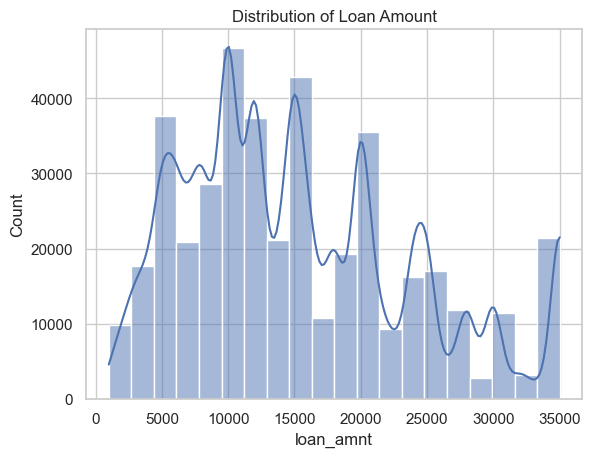

In [81]:
sns.histplot(data=df, x="loan_amnt",bins=20,kde=True) #For visulaize Data #histogram
plt.title("Distribution of Loan Amount")
plt.show()

In [94]:
# sns.histplot(data=df, x="funded_amnt",bins=20,kde=True)
# plt.title("Distribution of funded_amount")
# plt.show()

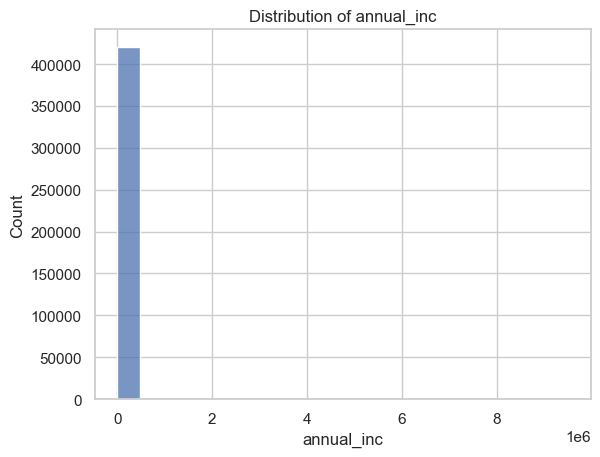

In [98]:
# sns.histplot(data=df, x="annual_inc",bins=20,kde=True)
# plt.title("Distribution of annual_inc")
# plt.show()

In [95]:
# sns.histplot(data=df, x="funded_amnt_inv",bins=20,kde=True)
# plt.title("Distribution of funded_amnt_inv")
# plt.show()

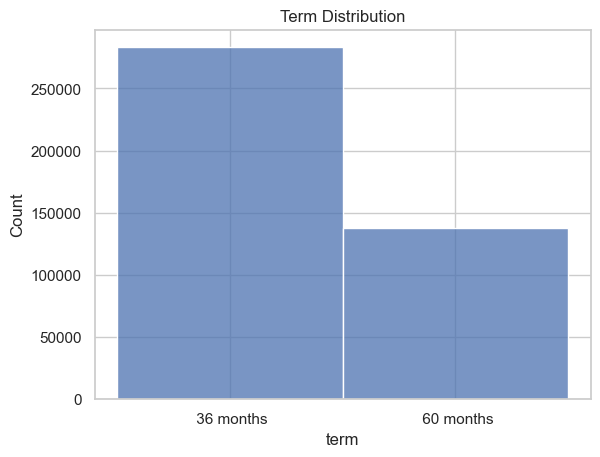

In [92]:
sns.histplot(data=df, x="term")
plt.title("Term Distribution")
plt.show()

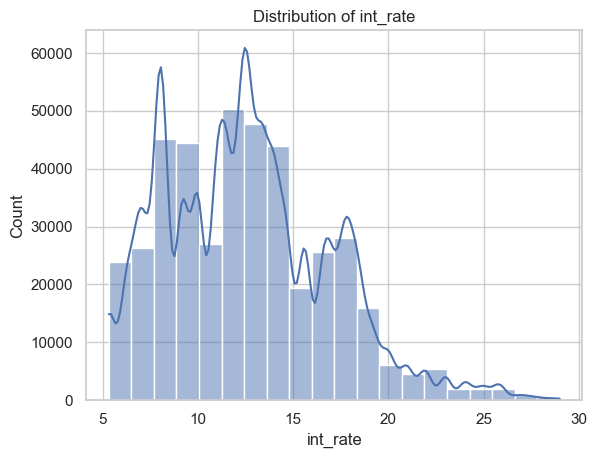

In [85]:
sns.histplot(data=df, x="int_rate",bins=20,kde=True) #mAX data pnts between 5-18 (int_rate)
plt.title("Distribution of int_rate")
plt.show()

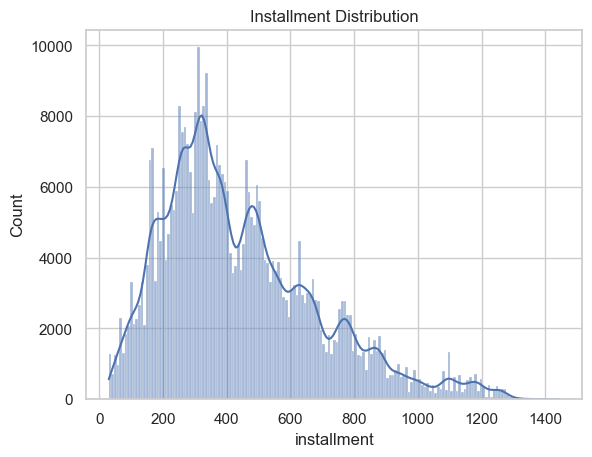

In [89]:
sns.histplot(data=df, x="installment",kde=True)
plt.title("Installment Distribution")
plt.show()

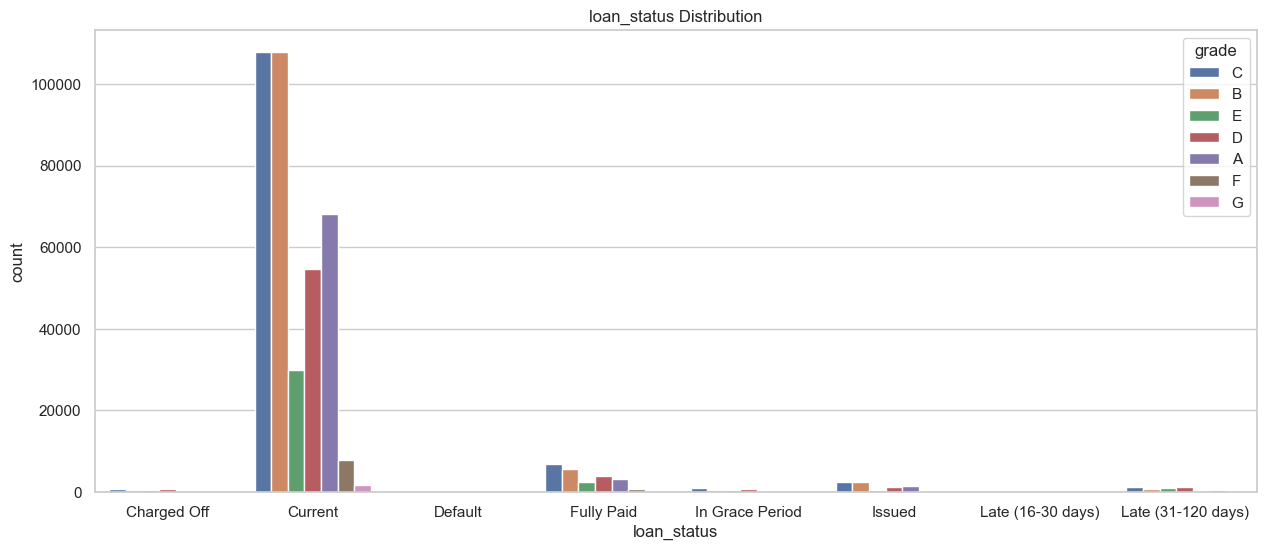

In [88]:
# Countplot for loan_status with hue for grade
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x="loan_status", hue="grade") #Categorical Variables
plt.title("loan_status Distribution")
plt.show()
#Current large data #Bar Plot

In [50]:
df["verification_status"].unique()

array(['Source Verified', 'Verified', 'Not Verified'], dtype=object)

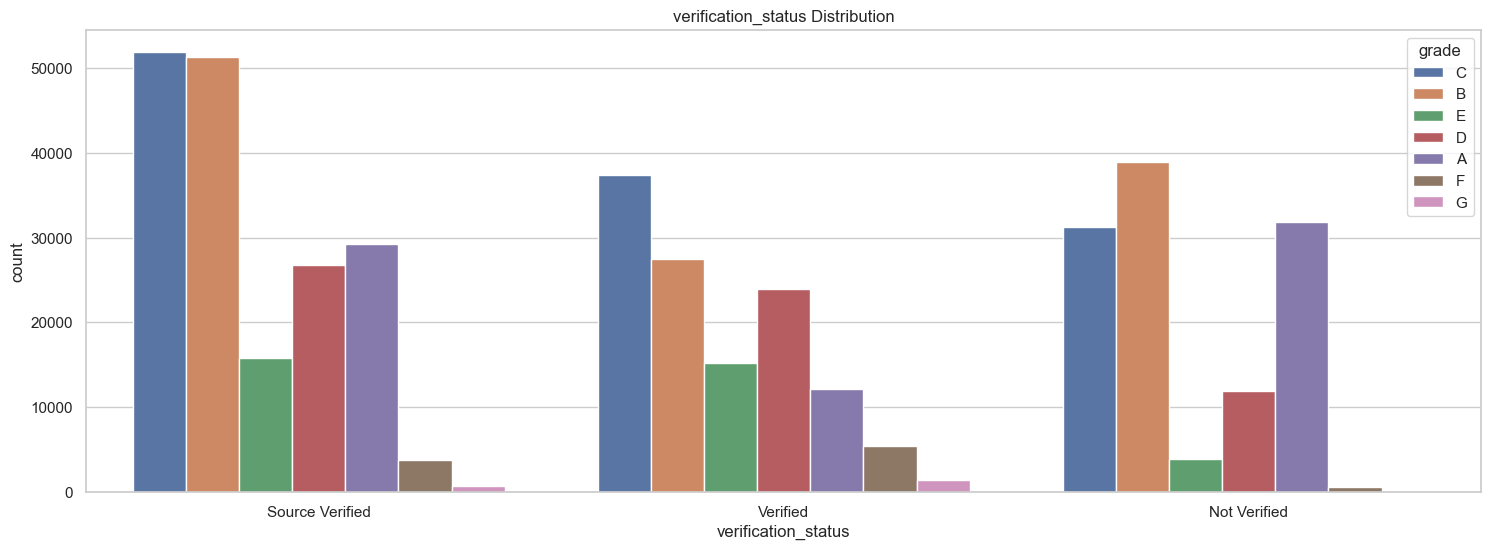

In [87]:
# Countplot for verification_status with hue for grade
plt.figure(figsize=(18, 6)) #Bar Plot
sns.countplot(data=df, x="verification_status", hue="grade") #Categorical Variables
plt.title("verification_status Distribution")
plt.show()


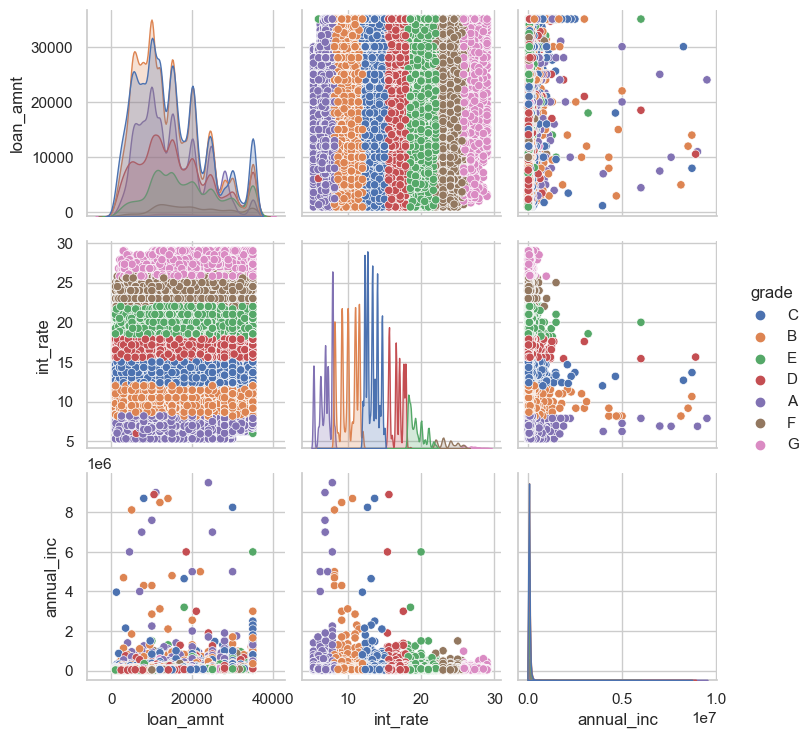

In [93]:
# Pair plot to visualize relationships
sns.pairplot(df[["loan_amnt", "int_rate", "annual_inc", "grade"]], hue="grade")
plt.show()

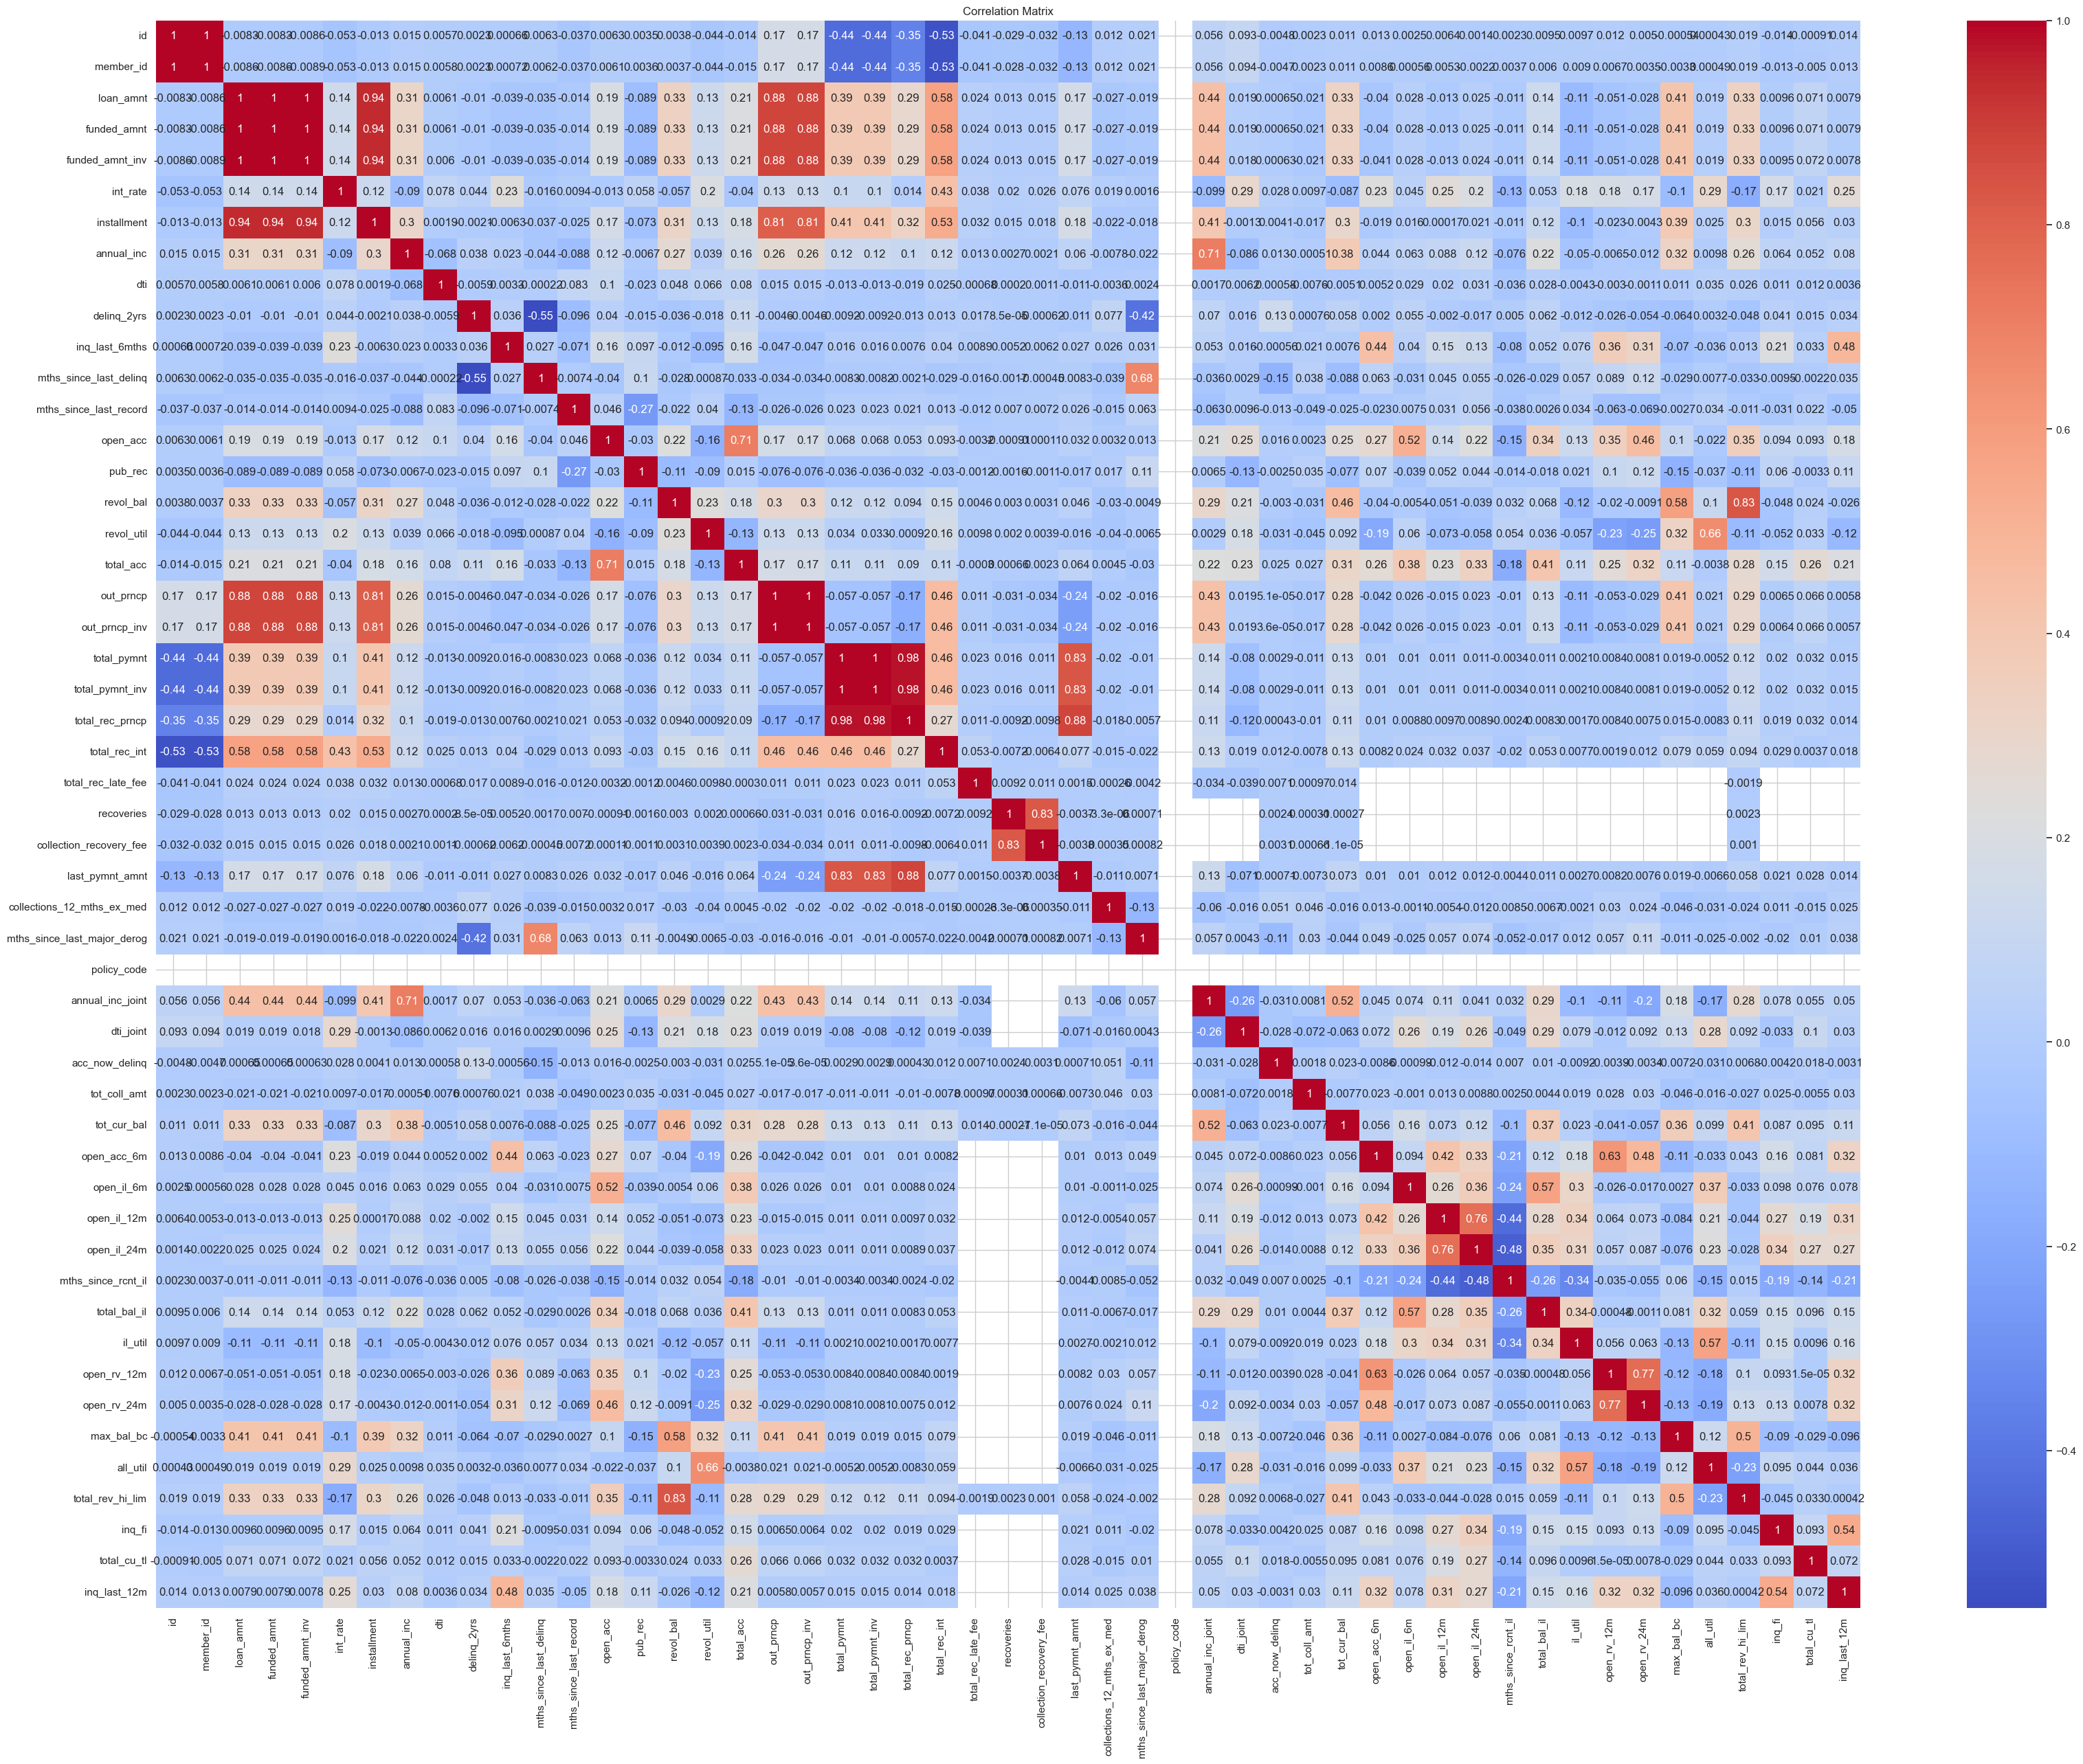

In [123]:
# Calculate the correlation matrix #HeatMap
plt.figure(figsize=(40, 30))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [124]:
df.head() #Del

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,60516983,64537751,20000,20000,20000,36 months,12.29,667.06,C,C1,Accounting Clerk,1 year,OWN,65000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,542xx,WI,20.72,0,Sep-00,1,NaN,NaN,25,0,31578,77.0,42,w,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,NaN,0.00,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,52303,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41000,NaN,NaN,NaN
1,60187139,64163931,11000,11000,11000,36 months,12.69,369.00,C,C2,Accounts Payable Lead,7 years,MORTGAGE,40000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,235xx,VA,24.57,0,Sep-02,0,36.0,80.0,13,1,5084,38.8,41,w,0.0,0.0,10043.49,10043.49,9942.67,100.81,0.0,0.0,0.0,Oct-15,10059.00,NaN,Jan-16,0,79.0,1,INDIVIDUAL,NaN,NaN,NaN,0,332,175731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13100,NaN,NaN,NaN
2,60356453,64333218,7000,7000,7000,36 months,9.99,225.84,B,B3,Nurse,6 years,MORTGAGE,32000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,350xx,AL,32.41,0,Feb-06,1,NaN,NaN,18,0,12070,74.0,36,f,0.0,0.0,221.96,221.96,167.56,54.40,0.0,0.0,0.0,Oct-15,225.84,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,202012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16300,NaN,NaN,NaN
3,59955769,63900496,10000,10000,10000,36 months,10.99,327.34,B,B4,Service Manager,10+ years,MORTGAGE,48000.0,Source Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,483xx,MI,30.98,0,Oct-99,2,NaN,NaN,18,0,22950,66.0,41,f,0.0,0.0,315.13,315.13,235.76,79.37,0.0,0.0,0.0,Oct-15,327.34,NaN,Jan-16,0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,0,108235,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34750,NaN,NaN,NaN
4,58703693,62544456,9550,9550,9550,36 months,19.99,354.87,E,E4,NaN,NaN,RENT,32376.0,Verified,Sep-15,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,546xx,WI,32.54,0,Nov-99,3,69.0,NaN,9,0,4172,29.6,26,w,0.0,0.0,333.66,333.66,195.78,137.88,0.0,0.0,0.0,Oct-15,354.87,NaN,Jan-16,0,69.0,1,INDIVIDUAL,NaN,NaN,NaN,0,0,45492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100,NaN,NaN,NaN


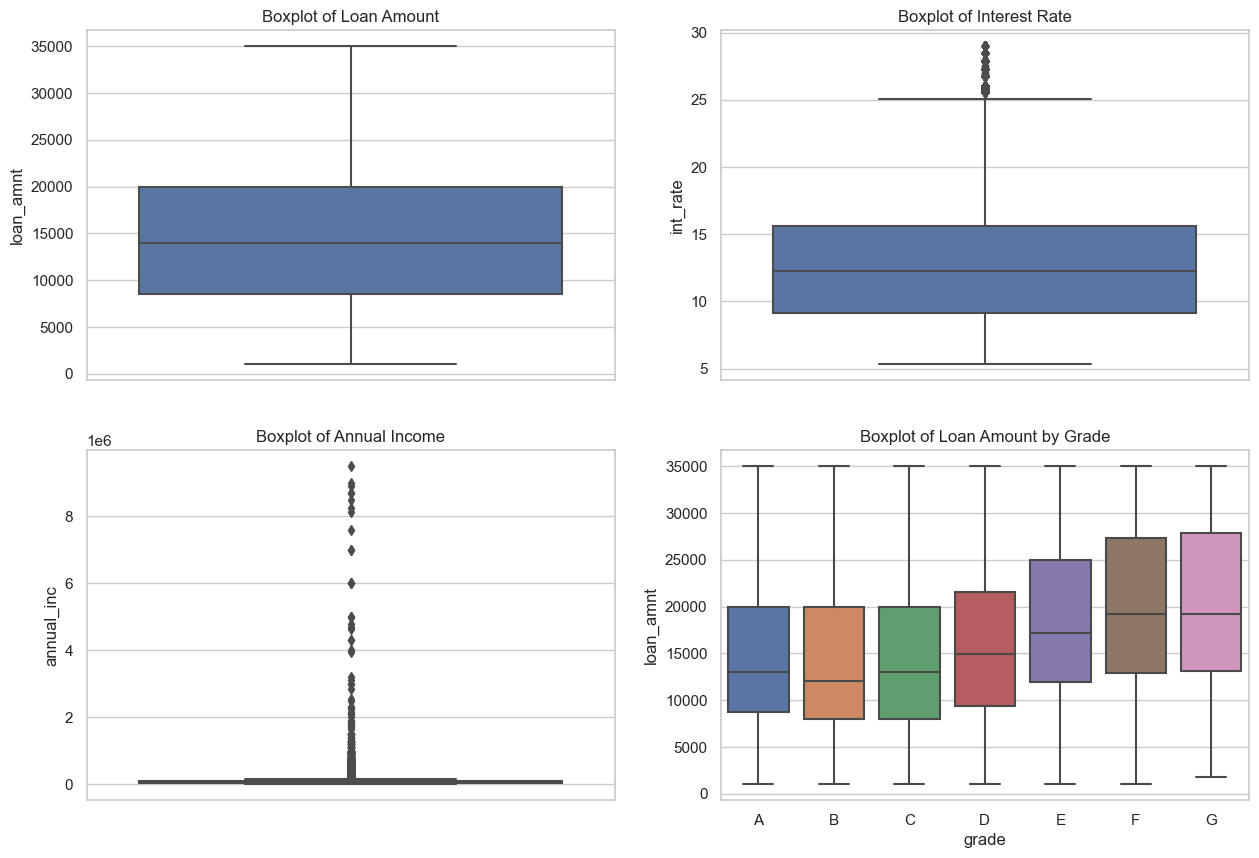

In [131]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))  # 2 rows, 2 columns


# Create box plots for 'loan_amnt', 'int_rate', 'annual_inc', and 'grade'
sns.boxplot(data=df, y='loan_amnt', ax=axes[0, 0])
sns.boxplot(data=df, y='int_rate', ax=axes[0, 1])
sns.boxplot(data=df, y='annual_inc', ax=axes[1, 0])
sns.boxplot(data=df, x='grade', y='loan_amnt', order=sorted(df['grade'].unique()), ax=axes[1, 1])

# Add titles to the subplots
axes[0, 0].set_title("Boxplot of Loan Amount")
axes[0, 1].set_title("Boxplot of Interest Rate")
axes[1, 0].set_title("Boxplot of Annual Income")
axes[1, 1].set_title("Boxplot of Loan Amount by Grade")

plt.show()


In [ ]:
plt.boxplot